In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

Based on Uri Alon's youtube course on systems biology https://www.youtube.com/watch?v=Z__BHVFP0Lk&list=PL775875BB77651029


Course premise: Biological systems can be understood in terms of principles "design principles" that unify different systems in a mathematical framework.

# Lecture 1

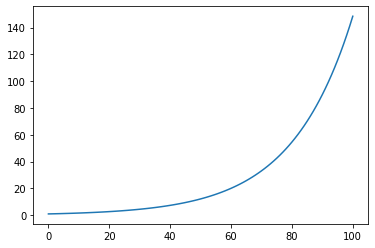

In [13]:
#useful scipy tutorial https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html
#Also the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
def func(y,t,params):
    x=y
    alpha=params
    dydt=alpha*x
    return dydt
    
alpha=0.5
y0=1
t = np.linspace(0, 10, 101)
soln=odeint(func, y0, t, args=(alpha,))

plt.plot(soln)


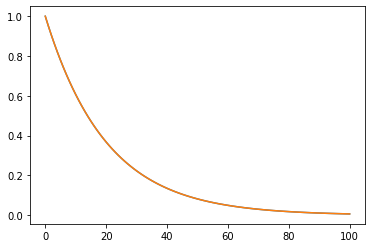

In [14]:
alpha=-0.5
y0=1
t = np.linspace(0, 10, 101)
soln=odeint(func, y0, t, args=(alpha,))

plt.plot(soln)

plt.plot(soln)

How do cells think?

A cell represents the environment using about 300 internal degrees of freedom via transcription factors.

There are around 4000 genes of the E. coli that make proteins. There's about 10**6 number of molecules in a cell. It follows that there are about 1000 molecular copies of each protein.

Environmental signals affect regulatory proteins called transcription factors.

The parts of the genomic sequence that regulates genes is called the promoter.

E. Coli has a transcription network with about 300 transcription factors and about 10000 arrows. This is the brain of the cell.


x->y

Calculate the dynamics of the concentration of Y, e.g. its dynamics.

X* is the concentration of the transcription factor. 

$\beta(X*)$->production rate

$\alpha$-> removal rate

$$\frac{dY}{dt}=\beta(X*)-\alpha Y$$

$$\alpha=\alpha_{degradation}-\alpha_{dilution}$$

Separation of timescales on the beta! Change in transcription factor concentration leads to an immediate change of $\beta$

In [20]:
def change_in_cons(y,t,params):
    x=y
    alpha,beta=params
    dydt=beta-alpha*x
    return dydt
    
alpha=0.5
y0=1
t = np.linspace(0, 10, 101)
beta=0.7
soln=odeint(change_in_cons, y0, t, params=(alpha,beta))
plt.plot(soln)

TypeError: odeint() got an unexpected keyword argument 'params'